In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
import seaborn as sns

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us = df[df['job_country'] == 'United States'].copy()

In [3]:
df_skills = df_us.explode('job_skills')

In [4]:
df_skills_grouped = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_grouped

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
df_total_skills = df_skills_grouped.reset_index(name='total_skills_count')
df_total_skills

,job_skills,job_title_short,total_skills_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [6]:
df_final_skills = df_total_skills.sort_values(by='total_skills_count', ascending=False)
df_final_skills

,job_skills,job_title_short,total_skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


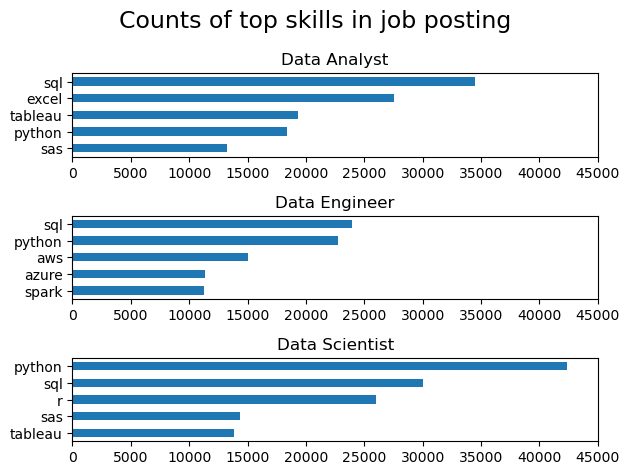

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate (job_titles):
   df_pivot =  df_final_skills[df_final_skills['job_title_short'] == job_title].head(5)


   df_pivot.plot(kind='barh', x='job_skills', ax=ax[i], title = job_title)

   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 45000)
   fig.tight_layout()
   fig.suptitle('Counts of top skills in job posting', fontsize=17)

In [8]:
df_percentage = df_us['job_title_short'].value_counts().reset_index(name='total_job_counts')
df_percentage

,job_title_short,total_job_counts
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [9]:
df_skills_percentage = pd.merge(df_final_skills, df_percentage, how='left', on='job_title_short')
df_skills_percentage['skill_percent'] = 100 * df_skills_percentage['total_skills_count']/ df_skills_percentage['total_job_counts']
df_skills_percentage

,job_skills,job_title_short,total_skills_count,total_job_counts,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


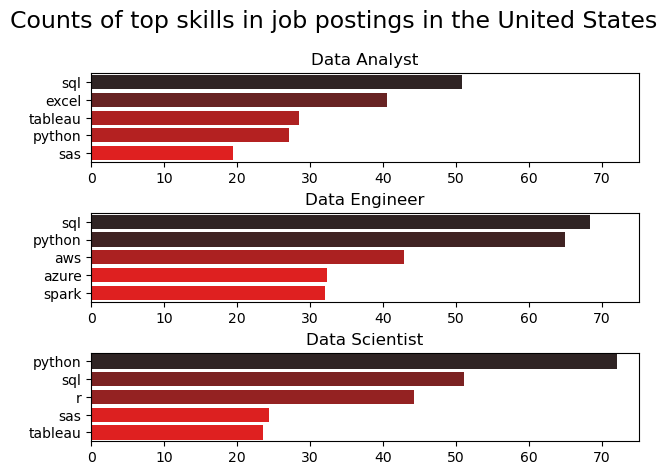

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate (job_titles):
   df_pivot =  df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
   #df_pivot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title = job_title)
   sns.barplot(data=df_pivot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:r_r')
   ax[i].set_title(job_title)
   ax[i].set_ylabel('') 
   ax[i].set_xlabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 75)
fig.suptitle('Counts of top skills in job postings in the United States', fontsize=17)
fig.tight_layout(h_pad=0.5)
plt.show()